In [2]:
import torch
import torchvision.datasets as datasets
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
## Raw stacking
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('../')

import sys  
sys.path.insert(0, '../../')
from utils.preprocessing import *
from utils.inference import *


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [5]:
# load the training data
mnist_train = datasets.FashionMNIST('data', train=True, download=True,
                                    transform = transform)

mnist_test = datasets.FashionMNIST('data', train=False, download=True,
                                    transform = transform)

mnist_train = list(mnist_train)
mnist_test = list(mnist_test)

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM as mixedglm

## Raw stacking

In [7]:
item = {
    0: ['T-shirt', 'Top'],
    1: ['Trouser', 'Bottom'],
    2: ['Pullover', 'Top'],
    3: ['Dress', 'Bottom'],
    4: ['Coat', 'Top'],
    5: ['Sandal', 'Shoe'],
    6: ['Shirt', 'Top'],
    7: ['Sneaker', 'Shoe'],
    8: ['Bag', 'Bag'],
    9: ['Ankle boot', 'Shoe']
}

    

In [8]:
%%time

ds1_size = 0.5
ds2_size = 0.5
ds3_size = 0.5
batch_size = 64
std_list = [0.1, 0.2, 0.1]

test_size = [1-ds1_size, 1-ds2_size, 1-ds3_size]

# biased toward target
category_wt1 = {
    'Top': [0.5],
    'Bottom': [0.5],
    'Shoe': [0.9],
    'Bag': [0.9]
}

# unbiased
category_wt2 = {
    'Top': [0.9],
    'Bottom': [0.9],
    'Shoe': [0.9],
    'Bag': [0.9]
}

# biased toward non-target
category_wt3 = {
    'Top': [0.9],
    'Bottom': [0.9],
    'Shoe': [0.3],
    'Bag': [0.3]
}

category_wt = [category_wt1, category_wt2, category_wt3]


(obs_X_list, obs_y_list, nonobs_X_list, nonobs_y_list, rest_X_list, rest_y_list) = generate_data_mixture_base(0, mnist_train, 
                                                       test_size, 
                                                       std_list, 
                                                       category_wt, 
                                                       item, batch_size)


trainX_selected = obs_X_list[0]
trainy_selected = obs_y_list[0]


obs_data = define_category(trainy_selected, category_wt1, item).drop('selection_wt', axis = 1)
obs_data['true_pct'] = 0.1
obs_data = obs_data.set_index('item')

obs_data.assign(true_abs_bias = lambda x: round((x.item_pct - x.true_pct)*100, 2))

CPU times: user 10.5 s, sys: 2.07 s, total: 12.5 s
Wall time: 12.2 s


,category,count,type,item_pct,true_pct,true_abs_bias
item,,,,,,
0,Top,1464,T-shirt,0.073549,0.1,-2.65
1,Bottom,1543,Trouser,0.077518,0.1,-2.25
2,Top,1511,Pullover,0.075911,0.1,-2.41
3,Bottom,1509,Dress,0.075810,0.1,-2.42
4,Top,1520,Coat,0.076363,0.1,-2.36
5,Shoe,2703,Sandal,0.135795,0.1,3.58
6,Top,1532,Shirt,0.076966,0.1,-2.30
7,Shoe,2762,Sneaker,0.138759,0.1,3.88
8,Bag,2676,Bag,0.134439,0.1,3.44


In [9]:
trainX_selected = obs_X_list[1]
trainy_selected = obs_y_list[1]


obs_data = define_category(trainy_selected, category_wt1, item).drop('selection_wt', axis = 1)
obs_data['true_pct'] = 0.1
obs_data = obs_data.set_index('item')

obs_data.assign(true_abs_bias = lambda x: round((x.item_pct - x.true_pct)*100, 2))

,category,count,type,item_pct,true_pct,true_abs_bias
item,,,,,,
0,Top,2655,T-shirt,0.098428,0.1,-0.16
1,Bottom,2679,Trouser,0.099318,0.1,-0.07
2,Top,2670,Pullover,0.098984,0.1,-0.10
3,Bottom,2730,Dress,0.101209,0.1,0.12
4,Top,2658,Coat,0.098539,0.1,-0.15
5,Shoe,2728,Sandal,0.101134,0.1,0.11
6,Top,2761,Shirt,0.102358,0.1,0.24
7,Shoe,2730,Sneaker,0.101209,0.1,0.12
8,Bag,2667,Bag,0.098873,0.1,-0.11


In [10]:
trainX_selected = obs_X_list[2]
trainy_selected = obs_y_list[2]


obs_data = define_category(trainy_selected, category_wt1, item).drop('selection_wt', axis = 1)
obs_data['true_pct'] = 0.1
obs_data = obs_data.set_index('item')

obs_data.assign(true_abs_bias = lambda x: round((x.item_pct - x.true_pct)*100, 2))

,category,count,type,item_pct,true_pct,true_abs_bias
item,,,,,,
0,Top,2647,T-shirt,0.134188,0.1,3.42
1,Bottom,2724,Trouser,0.138092,0.1,3.81
2,Top,2672,Pullover,0.135456,0.1,3.55
3,Bottom,2705,Dress,0.137129,0.1,3.71
4,Top,2664,Coat,0.135050,0.1,3.51
5,Shoe,881,Sandal,0.044662,0.1,-5.53
6,Top,2772,Shirt,0.140525,0.1,4.05
7,Shoe,910,Sneaker,0.046132,0.1,-5.39
8,Bag,860,Bag,0.043597,0.1,-5.64


In [12]:
category_wt[0]

{'Top': [0.5], 'Bottom': [0.5], 'Shoe': [0.9], 'Bag': [0.9]}

In [11]:
%%time
std_list = [0.1, 0.2, 0.1]

# T-shirt
plot_1 = plot1(0.5, 0.5, std_list, mnist_train, item, batch_size)

[0.5, 0.9, 0.5]


TypeError: rowStackingModel_inference() takes 6 positional arguments but 7 were given

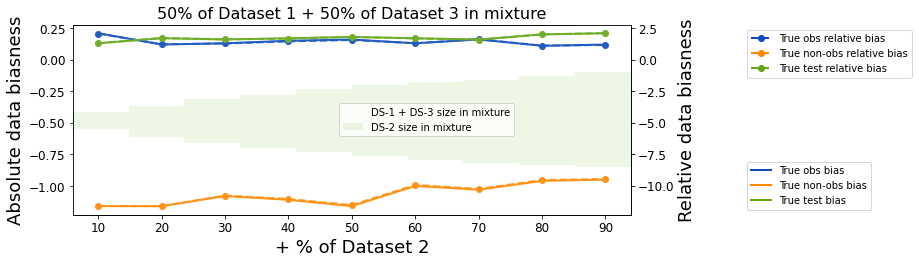

In [115]:
ds1_size = 0.5
ds3_size = 0.5
plot_1 = pd.read_csv(f'Data_bias_baseline_acc_{round((1-ds1_size)*100)}_{round((1-ds3_size)*100)}.csv').drop('Unnamed: 0', axis =1)
just_plot1(plot_1)

In [112]:
plot_1

,+ % of Dataset 2,True obs bias,True non-obs bias,True obs relative bias,True non-obs relative bias,True test bias,True test relative bias,Num obs samples,Num nonobs samples
0,10.0,0.21,-1.16,2.09,-11.63,0.13,1.32,44998.0,21002.0
1,20.0,0.12,-1.16,1.24,-11.64,0.17,1.74,50496.0,21504.0
2,30.0,0.13,-1.08,1.30,-10.80,0.16,1.63,55892.0,22108.0
3,40.0,0.15,-1.11,1.47,-11.07,0.17,1.69,61229.0,22771.0
4,50.0,0.16,-1.16,1.58,-11.56,0.18,1.83,66605.0,23395.0
5,60.0,0.13,-1.00,1.32,-9.95,0.17,1.70,72057.0,23943.0
6,70.0,0.16,-1.03,1.64,-10.27,0.16,1.60,77449.0,24551.0
7,80.0,0.11,-0.96,1.13,-9.57,0.20,2.03,82930.0,25070.0
8,90.0,0.12,-0.95,1.18,-9.48,0.21,2.12,88239.0,25761.0


[0.5, 0.9, 0.09999999999999998]
====================== prepare data ======================
took 0.45 sec
took 0.50 sec
[0.5, 0.8, 0.09999999999999998]
====================== prepare data ======================
took 0.43 sec
took 0.48 sec
[0.5, 0.7, 0.09999999999999998]
====================== prepare data ======================
took 0.42 sec
took 0.47 sec
[0.5, 0.6, 0.09999999999999998]
====================== prepare data ======================
took 0.40 sec
took 0.44 sec
[0.5, 0.5, 0.09999999999999998]
====================== prepare data ======================
took 0.39 sec
took 0.44 sec
[0.5, 0.4, 0.09999999999999998]
====================== prepare data ======================
took 0.37 sec
took 0.42 sec
[0.5, 0.30000000000000004, 0.09999999999999998]
====================== prepare data ======================
took 0.36 sec
took 0.41 sec
[0.5, 0.19999999999999996, 0.09999999999999998]
====================== prepare data ======================
took 0.34 sec
took 0.38 sec
[0.5, 0.09999999

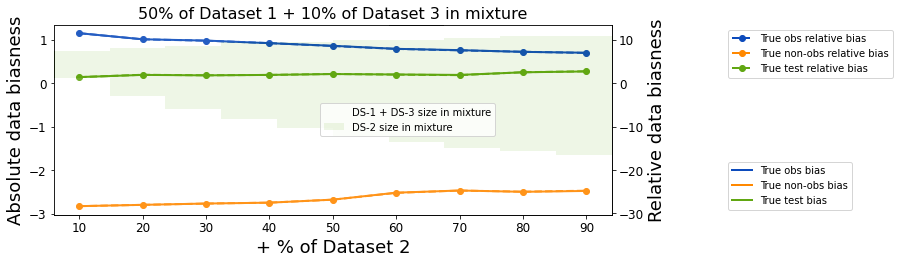

In [64]:
%%time

# T-shirt
plot_1 = plot1(0.5, 0.9, std_list)

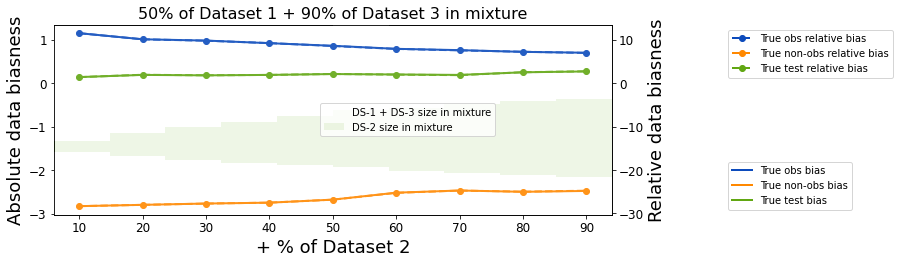

In [116]:
ds1_size = 0.5
ds3_size = 0.9
plot_1 = pd.read_csv(f'Data_bias_baseline_acc_{round((1-ds1_size)*100)}_{round((1-ds3_size)*100)}.csv').drop('Unnamed: 0', axis =1)
just_plot1(plot_1)

In [65]:
plot_1

,+ % of Dataset 2,True obs bias,True non-obs bias,True obs relative bias,True non-obs relative bias,True test bias,True test relative bias,Num obs samples,Num nonobs samples
0,10.0,1.15,-2.83,11.51,-28.31,0.14,1.39,60845.0,29155.0
1,20.0,1.01,-2.80,10.10,-28.01,0.19,1.94,66288.0,29712.0
2,30.0,0.98,-2.77,9.78,-27.72,0.18,1.81,71631.0,30369.0
3,40.0,0.92,-2.75,9.23,-27.50,0.19,1.90,77129.0,30871.0
4,50.0,0.86,-2.68,8.56,-26.82,0.21,2.12,82461.0,31539.0
5,60.0,0.79,-2.52,7.89,-25.25,0.20,1.97,87867.0,32133.0
6,70.0,0.76,-2.47,7.55,-24.72,0.19,1.85,93414.0,32586.0
7,80.0,0.72,-2.50,7.24,-24.98,0.25,2.52,98595.0,33405.0
8,90.0,0.70,-2.48,6.96,-24.75,0.27,2.74,104099.0,33901.0


[0.09999999999999998, 0.9, 0.5]
====================== prepare data ======================
took 0.44 sec
took 0.49 sec
[0.09999999999999998, 0.8, 0.5]
====================== prepare data ======================
took 0.43 sec
took 0.48 sec
[0.09999999999999998, 0.7, 0.5]
====================== prepare data ======================
took 0.41 sec
took 0.46 sec
[0.09999999999999998, 0.6, 0.5]
====================== prepare data ======================
took 0.40 sec
took 0.45 sec
[0.09999999999999998, 0.5, 0.5]
====================== prepare data ======================
took 0.38 sec
took 0.43 sec
[0.09999999999999998, 0.4, 0.5]
====================== prepare data ======================
took 0.38 sec
took 0.43 sec
[0.09999999999999998, 0.30000000000000004, 0.5]
====================== prepare data ======================
took 0.35 sec
took 0.40 sec
[0.09999999999999998, 0.19999999999999996, 0.5]
====================== prepare data ======================
took 0.34 sec
took 0.39 sec
[0.0999999999999

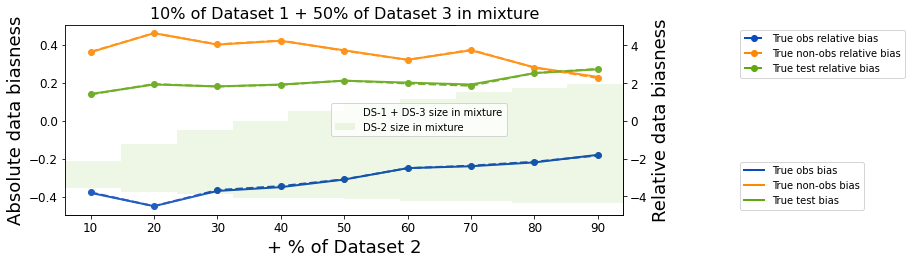

In [66]:
%%time

# T-shirt
plot_1 = plot1(0.9, 0.5, std_list)

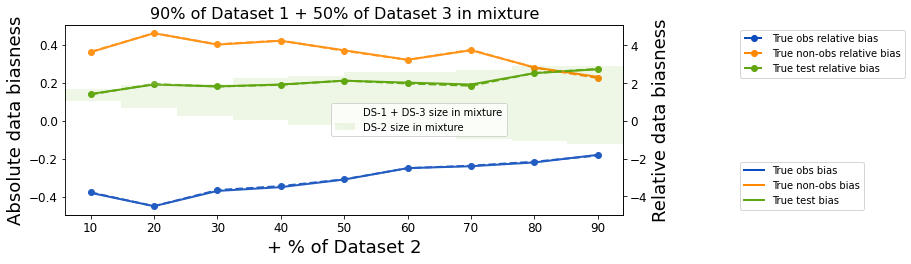

In [137]:
ds1_size = 0.9
ds3_size = 0.5
plot_1 = pd.read_csv(f'Data_bias_baseline_acc_{round((1-ds1_size)*100)}_{round((1-ds3_size)*100)}.csv').drop('Unnamed: 0', axis =1)
just_plot1(plot_1)

In [138]:
plot_1

,+ % of Dataset 2,True obs bias,True non-obs bias,True obs relative bias,True non-obs relative bias,True test bias,True test relative bias,Num obs samples,Num nonobs samples
0,10.0,-0.38,0.36,-3.79,3.64,0.14,1.39,60928.0,29072.0
1,20.0,-0.45,0.46,-4.52,4.63,0.19,1.94,66380.0,29620.0
2,30.0,-0.37,0.40,-3.67,4.04,0.18,1.81,71772.0,30228.0
3,40.0,-0.35,0.42,-3.46,4.24,0.19,1.90,77253.0,30747.0
4,50.0,-0.31,0.37,-3.10,3.70,0.21,2.12,82562.0,31438.0
5,60.0,-0.25,0.32,-2.51,3.22,0.20,1.97,87961.0,32039.0
6,70.0,-0.24,0.37,-2.38,3.75,0.19,1.85,93460.0,32540.0
7,80.0,-0.22,0.28,-2.17,2.81,0.25,2.52,98743.0,33257.0
8,90.0,-0.18,0.23,-1.84,2.26,0.27,2.74,104156.0,33844.0


## Additive model

In [187]:
%%time

std_list = [0.1, 0.2, 0.1]
# T-shirt
plot_2 = plot2(0.5, 0.5, std_list)

[0.5, 0.9, 0.5]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.48 sec
====================== row-stacking + base inference ======================
took 14.82 sec
====================== row-stacking + additiveModel inference ======================
took 29.14 sec
[0.5, 0.8, 0.5]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.45 sec
====================== row-stacking + base inference ======================
took 15.92 sec
====================== row-stacking + additiveModel inference ======================
took 31.04 sec
[0.5, 0.7, 0.5]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.40 sec
====================== row-stacking + base inference ======================
took 17.11 sec
====================== row-stacking + additiveModel inference ======================
took 32.99 sec
[0.5, 0.6, 0.5]
======

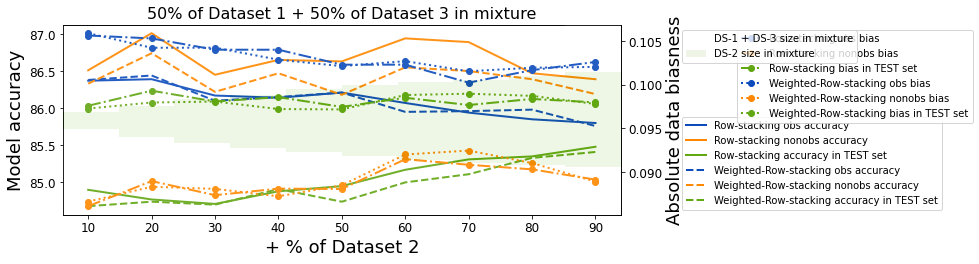

In [193]:
ds1_size = 0.5
ds3_size = 0.5
plot_2 = pd.read_csv(f'Model_bias_baseline_acc_{round((1-ds1_size)*100)}_{round((1-ds3_size)*100)}.csv').drop('Unnamed: 0', axis =1)
just_plot2(plot_2)

In [194]:
plot_2.head()

,+ % of Dataset 2,Row-stacking obs accuracy,Row-stacking nonobs accuracy,Row-stacking accuracy in TEST set,Weighted-Row-stacking obs accuracy,Weighted-Row-stacking nonobs accuracy,Weighted-Row-stacking accuracy in TEST set,Row-stacking obs bias,Row-stacking nonobs bias,Row-stacking bias in TEST set,Weighted-Row-stacking obs bias,Weighted-Row-stacking nonobs bias,Weighted-Row-stacking bias in TEST set,Num obs samples,Num nonobs samples
0,10.0,86.37,86.51,84.90,86.38,86.33,84.68,0.105649,0.086087,0.097596,0.105916,0.086611,0.097275,44998.0,21002.0
1,20.0,86.39,87.01,84.77,86.44,86.74,84.74,0.105315,0.088960,0.099324,0.104246,0.088309,0.097969,50496.0,21504.0
2,30.0,86.17,86.45,84.71,86.10,86.22,84.70,0.104022,0.087344,0.098088,0.104255,0.088068,0.098082,55892.0,22108.0
3,40.0,86.14,86.65,84.88,86.15,86.47,84.91,0.104019,0.088095,0.098583,0.102876,0.087216,0.097219,61229.0,22771.0
4,50.0,86.21,86.63,84.95,86.21,86.18,84.74,0.102305,0.088053,0.097467,0.102139,0.088480,0.097174,66605.0,23395.0


In [190]:
%%time

# T-shirt
plot_2 = plot2(0.5, 0.9, std_list)

[0.5, 0.9, 0.09999999999999998]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.31 sec
====================== row-stacking + base inference ======================
took 19.72 sec
====================== row-stacking + additiveModel inference ======================
took 38.13 sec
[0.5, 0.8, 0.09999999999999998]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.28 sec
====================== row-stacking + base inference ======================
took 19.91 sec
====================== row-stacking + additiveModel inference ======================
took 38.85 sec
[0.5, 0.7, 0.09999999999999998]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.24 sec
====================== row-stacking + base inference ======================
took 21.47 sec
====================== row-stacking + additiveModel inference ============

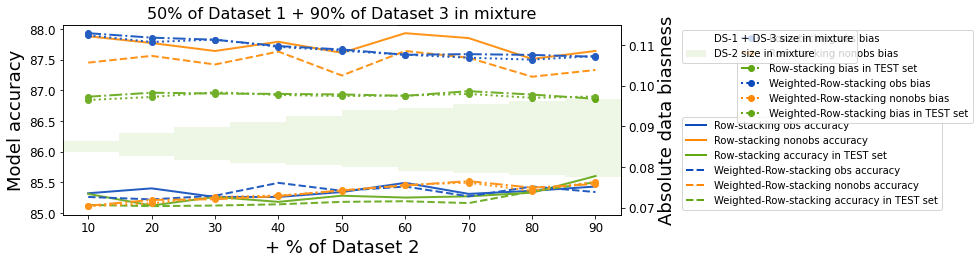

In [192]:
ds1_size = 0.5
ds3_size = 0.9
plot_2 = pd.read_csv(f'Model_bias_baseline_acc_{round((1-ds1_size)*100)}_{round((1-ds3_size)*100)}.csv').drop('Unnamed: 0', axis =1)
just_plot2(plot_2)

In [195]:
plot_2

,+ % of Dataset 2,Row-stacking obs accuracy,Row-stacking nonobs accuracy,Row-stacking accuracy in TEST set,Weighted-Row-stacking obs accuracy,Weighted-Row-stacking nonobs accuracy,Weighted-Row-stacking accuracy in TEST set,Row-stacking obs bias,Row-stacking nonobs bias,Row-stacking bias in TEST set,Weighted-Row-stacking obs bias,Weighted-Row-stacking nonobs bias,Weighted-Row-stacking bias in TEST set,Num obs samples,Num nonobs samples
0,10.0,86.37,86.51,84.90,86.38,86.33,84.68,0.105649,0.086087,0.097596,0.105916,0.086611,0.097275,44998.0,21002.0
1,20.0,86.39,87.01,84.77,86.44,86.74,84.74,0.105315,0.088960,0.099324,0.104246,0.088309,0.097969,50496.0,21504.0
2,30.0,86.17,86.45,84.71,86.10,86.22,84.70,0.104022,0.087344,0.098088,0.104255,0.088068,0.098082,55892.0,22108.0
3,40.0,86.14,86.65,84.88,86.15,86.47,84.91,0.104019,0.088095,0.098583,0.102876,0.087216,0.097219,61229.0,22771.0
4,50.0,86.21,86.63,84.95,86.21,86.18,84.74,0.102305,0.088053,0.097467,0.102139,0.088480,0.097174,66605.0,23395.0
5,60.0,86.07,86.94,85.17,85.95,86.55,85.00,0.102308,0.091467,0.098512,0.102710,0.092010,0.098825,72057.0,23943.0
6,70.0,85.94,86.89,85.31,85.96,86.50,85.11,0.100247,0.090831,0.097679,0.101551,0.092461,0.098979,77449.0,24551.0
7,80.0,85.85,86.47,85.35,85.98,86.39,85.33,0.101676,0.090307,0.098375,0.101953,0.091025,0.098731,82930.0,25070.0
8,90.0,85.80,86.39,85.48,85.76,86.19,85.41,0.102619,0.089127,0.097985,0.102052,0.088894,0.097798,88239.0,25761.0


In [196]:
%%time

# T-shirt
plot_2 = plot2(0.9, 0.5, std_list)

[0.09999999999999998, 0.9, 0.5]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.33 sec
====================== row-stacking + base inference ======================
took 17.19 sec
====================== row-stacking + additiveModel inference ======================
took 33.51 sec
[0.09999999999999998, 0.8, 0.5]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.28 sec
====================== row-stacking + base inference ======================
took 18.15 sec
====================== row-stacking + additiveModel inference ======================
took 35.30 sec
[0.09999999999999998, 0.7, 0.5]
=======train=======
=======train score=======
====================== prepare data ======================
took 1.22 sec
====================== row-stacking + base inference ======================
took 18.87 sec
====================== row-stacking + additiveModel inference ============

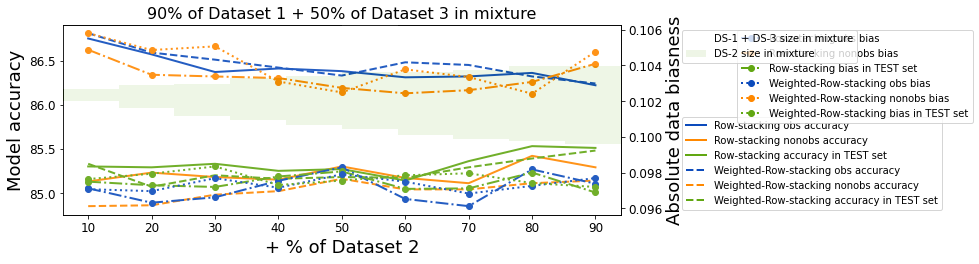

In [197]:
ds1_size = 0.9
ds3_size = 0.5
plot_2 = pd.read_csv(f'Model_bias_baseline_acc_{round((1-ds1_size)*100)}_{round((1-ds3_size)*100)}.csv').drop('Unnamed: 0', axis =1)
just_plot2(plot_2)

In [198]:
plot_2

,+ % of Dataset 2,Row-stacking obs accuracy,Row-stacking nonobs accuracy,Row-stacking accuracy in TEST set,Weighted-Row-stacking obs accuracy,Weighted-Row-stacking nonobs accuracy,Weighted-Row-stacking accuracy in TEST set,Row-stacking obs bias,Row-stacking nonobs bias,Row-stacking bias in TEST set,Weighted-Row-stacking obs bias,Weighted-Row-stacking nonobs bias,Weighted-Row-stacking bias in TEST set,Num obs samples,Num nonobs samples
0,10.0,86.75,85.13,85.30,86.81,84.85,85.33,0.097115,0.104878,0.097489,0.097065,0.105806,0.097633,60928.0,29072.0
1,20.0,86.57,85.23,85.29,86.59,84.86,85.07,0.096309,0.103477,0.097286,0.096957,0.104862,0.097933,66380.0,29620.0
2,30.0,86.37,85.18,85.33,86.51,84.98,85.20,0.096611,0.103381,0.097192,0.097684,0.105068,0.098342,71772.0,30228.0
3,40.0,86.41,85.15,85.25,86.42,85.02,85.16,0.097537,0.103295,0.097778,0.097148,0.103099,0.097301,77253.0,30747.0
4,50.0,86.38,85.30,85.27,86.33,85.16,85.18,0.098290,0.102742,0.098061,0.097902,0.102487,0.097551,82562.0,31438.0
5,60.0,86.31,85.17,85.14,86.48,85.04,85.17,0.096520,0.102438,0.097083,0.097486,0.103780,0.097844,87961.0,32039.0
6,70.0,86.32,85.11,85.36,86.45,85.04,85.29,0.096116,0.102612,0.097111,0.096822,0.103350,0.097957,93460.0,32540.0
7,80.0,86.36,85.42,85.53,86.32,85.11,85.39,0.098174,0.103076,0.098000,0.097252,0.102415,0.097410,98743.0,33257.0
8,90.0,86.22,85.29,85.51,86.24,85.14,85.48,0.097373,0.104095,0.096881,0.097690,0.104775,0.097190,104156.0,33844.0
